In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json
from ultralytics import YOLO

In [2]:
data = pd.read_csv('../data/interim/annots_imgs_merged.csv')
line = data[data['chart-type'] == 'line']
line = line[['data-series','visual-elements.lines','file_name','image_path']]
line.columns = ['data_series','data_coords','name','path']
line.reset_index(drop=True, inplace=True)
line.head()

,data_series,data_coords,name,path
0,"[{'x': 'Afghanistan', 'y': 97.39144067786003},...","[[{'x': 79.0, 'y': 118.98393922747988}, {'x': ...",a2858b17f9de,../data/interim/Lineplots/a2858b17f9de.jpg
1,"[{'x': '1990', 'y': 460139.397945082}, {'x': '...","[[{'x': 112.66666666666667, 'y': 116.484848484...",2208375c43e9,../data/interim/Lineplots/2208375c43e9.jpg
2,"[{'x': '0', 'y': 20.138269927536232}, {'x': '2...","[[{'x': 205.33333333333334, 'y': 270.077777777...",49e8a20490e8,../data/interim/Lineplots/49e8a20490e8.jpg
3,"[{'x': 'United Kingdom', 'y': 312370881.669299...","[[{'x': 92.0, 'y': 130.25}, {'x': 130.5, 'y': ...",bb52cf8971a1,../data/interim/Lineplots/bb52cf8971a1.jpg
4,"[{'x': 'Lithuania', 'y': 25.360055676098174}, ...","[[{'x': 86.66666666666667, 'y': 201.8333333333...",edf075ca7f11,../data/interim/Lineplots/edf075ca7f11.jpg


In [3]:
model = YOLO('/Users/matt/Desktop/graphs-capstone/models/lineplot_model.pt')

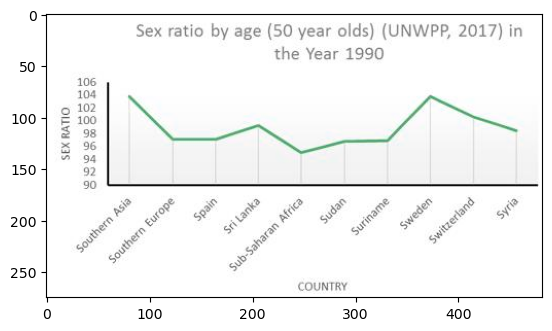

In [40]:
# Test image
path = line['path'].values[9000]
img = cv2.imread(path)
plt.imshow(img)
plt.show()

In [41]:
# Predict on the image
results = model(path)


image 1/1 /Users/matt/Desktop/graphs-capstone/notebooks/../data/interim/Lineplots/f4a7f94a3060.jpg: 384x640 11 ps, 338.4ms
Speed: 20.3ms preprocess, 338.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


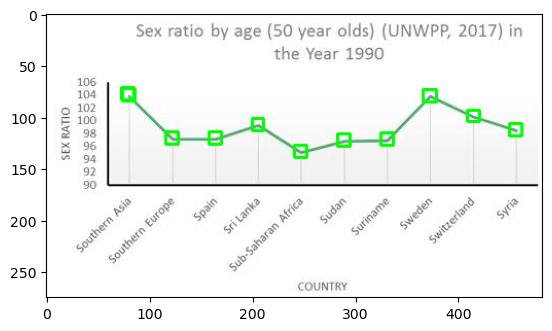

In [42]:
# Extract bboxes from model prediction
bbox_pred = []
res = results[0].boxes.data
for bbox in res:
    x1, y1, x2, y2, probs, pred = bbox
    bbox_pred.append((int(x1.item()), int(y1.item()), int(x2.item()), int(y2.item())))


copy = img.copy()
for bbox in bbox_pred:
    x1, y1, x2, y2 = bbox
    cv2.rectangle(copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(copy)
plt.show()